In [ ]:
# Install package for UCI repo
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo, list_available_datasets

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from xgboost import XGBClassifier, plot_importance

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
# Download dataset
uci_dataset = fetch_ucirepo(id=109)
# alternatively: fetch_ucirepo(name='CDC Diabetes Health Indicators')
# access data
X = uci_dataset.data.features
y = uci_dataset.data.targets
print(X.head())

   Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  
0                        

In [ ]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

In [ ]:
print(X.describe())

          Alcohol   Malicacid         Ash  Alcalinity_of_ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

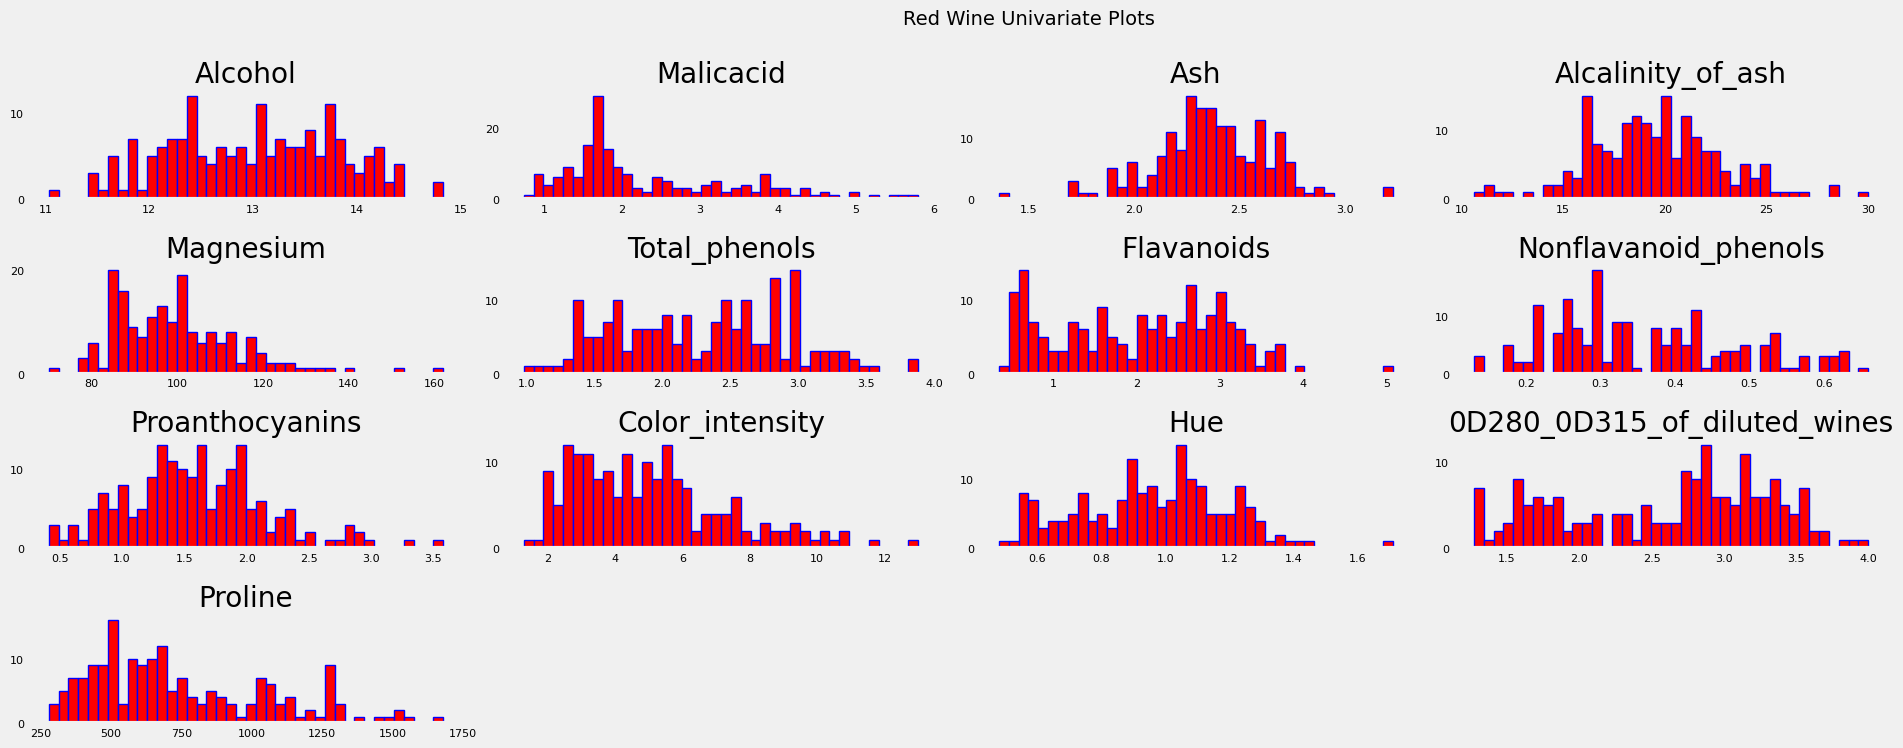

In [ ]:
X.hist(bins=40, edgecolor='b', linewidth=1.0,
       xlabelsize=8, ylabelsize=8, grid=False,
       figsize=(16,6), color='red')
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=14);

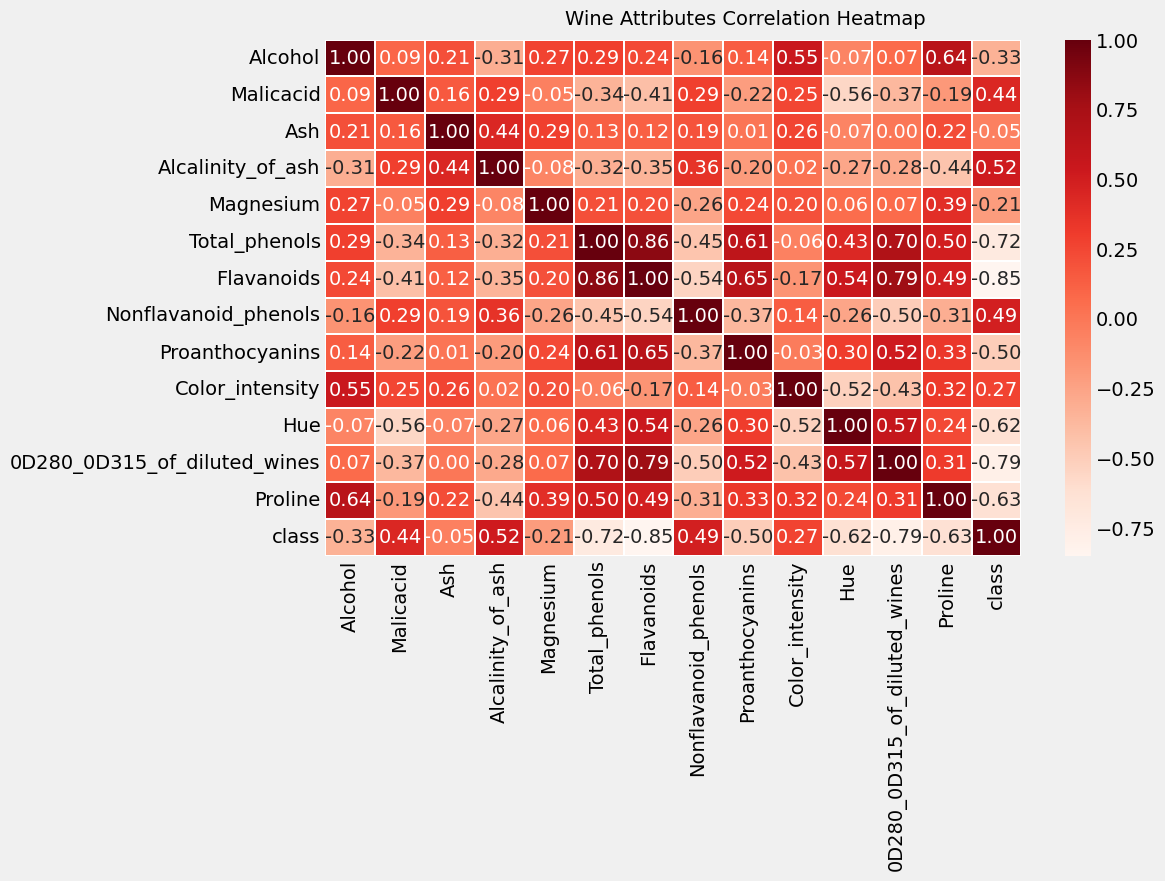

In [ ]:
# for visualizing correlations
f, ax = plt.subplots(figsize=(10, 6))
corr = uci_dataset.data.original.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Reds",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

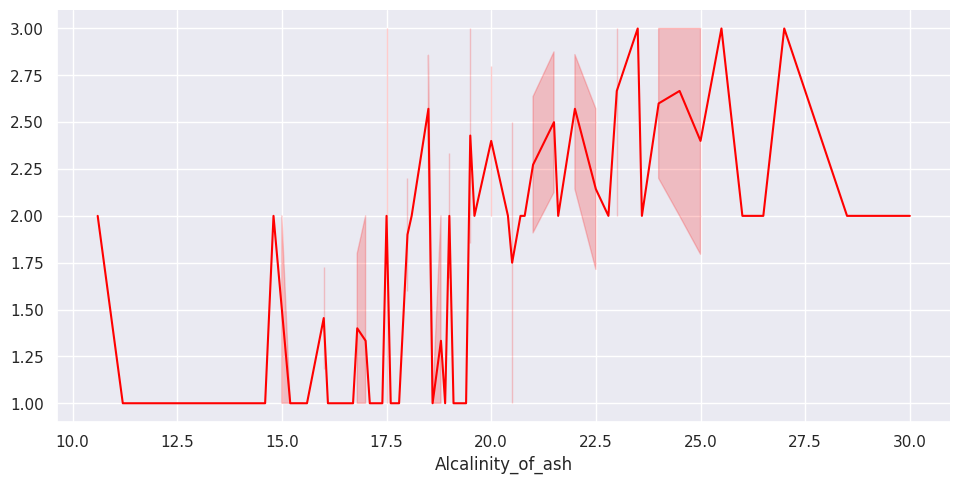

In [ ]:
# uci_dataset.data.original
sns.set()
sns.relplot(data=X, x='Alcalinity_of_ash', y=y.values.flatten(), kind='line', height=5, aspect=2, color='red');

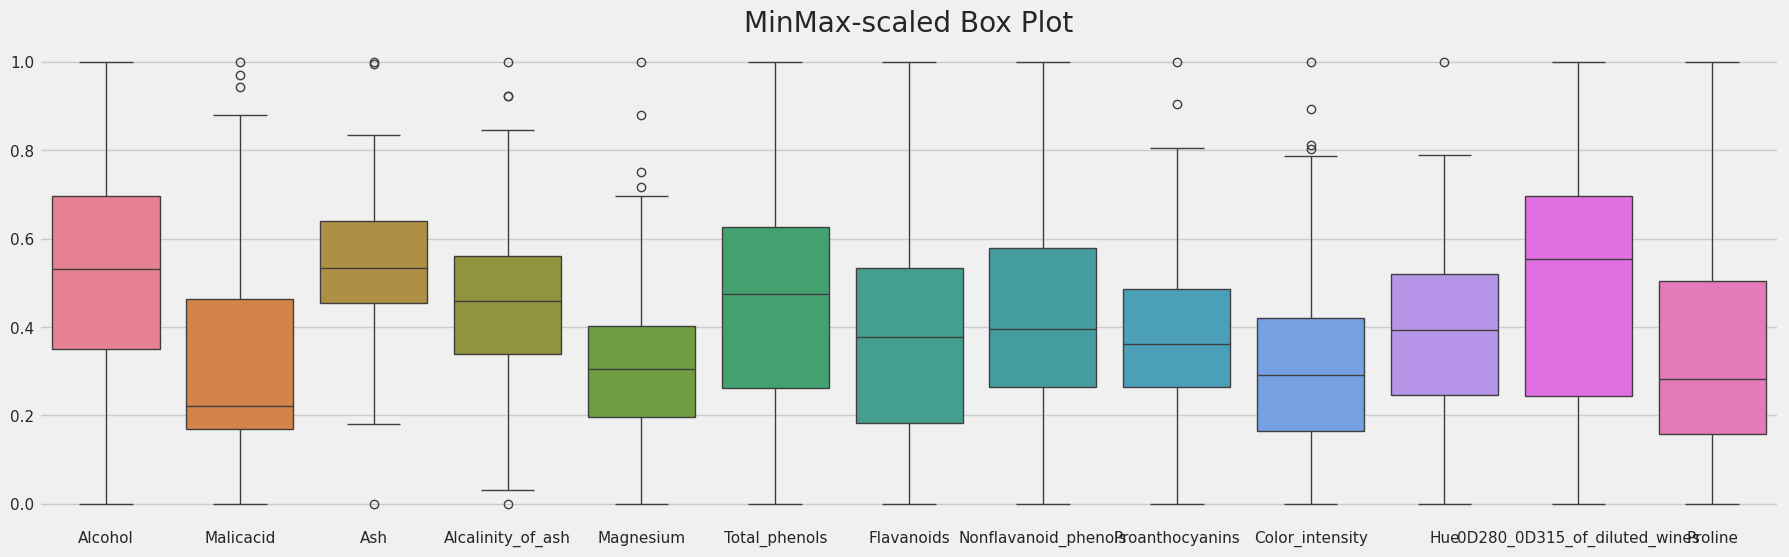

In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Fit and transform the DataFrame
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Create a box plot using Seaborn
plt.figure(figsize=(20, 6))
sns.boxplot(data=X_norm)
plt.title("MinMax-scaled Box Plot")
plt.show()

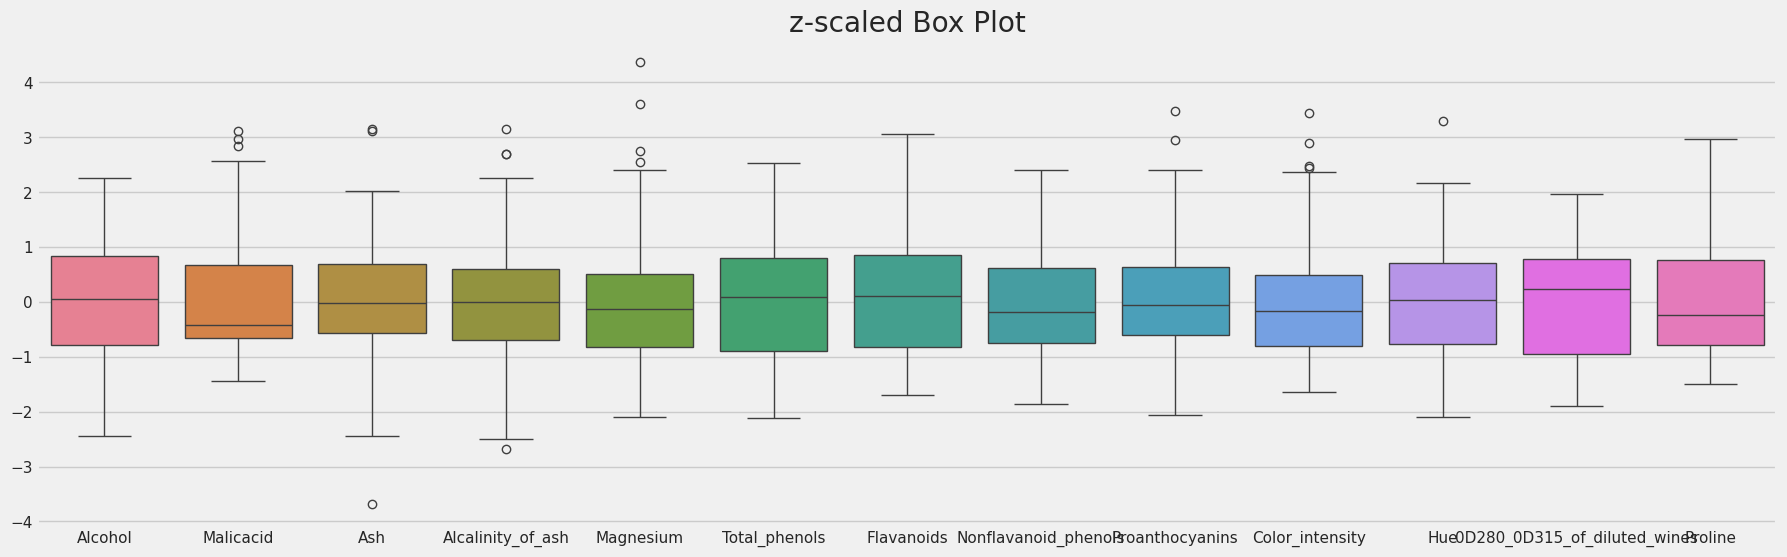

In [ ]:
# Create a MinMaxScaler object
scaler = StandardScaler()
# Fit and transform the DataFrame
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Create a box plot using Seaborn
plt.figure(figsize=(20, 6))
sns.boxplot(data=X_norm)
plt.title("z-scaled Box Plot")
plt.show()

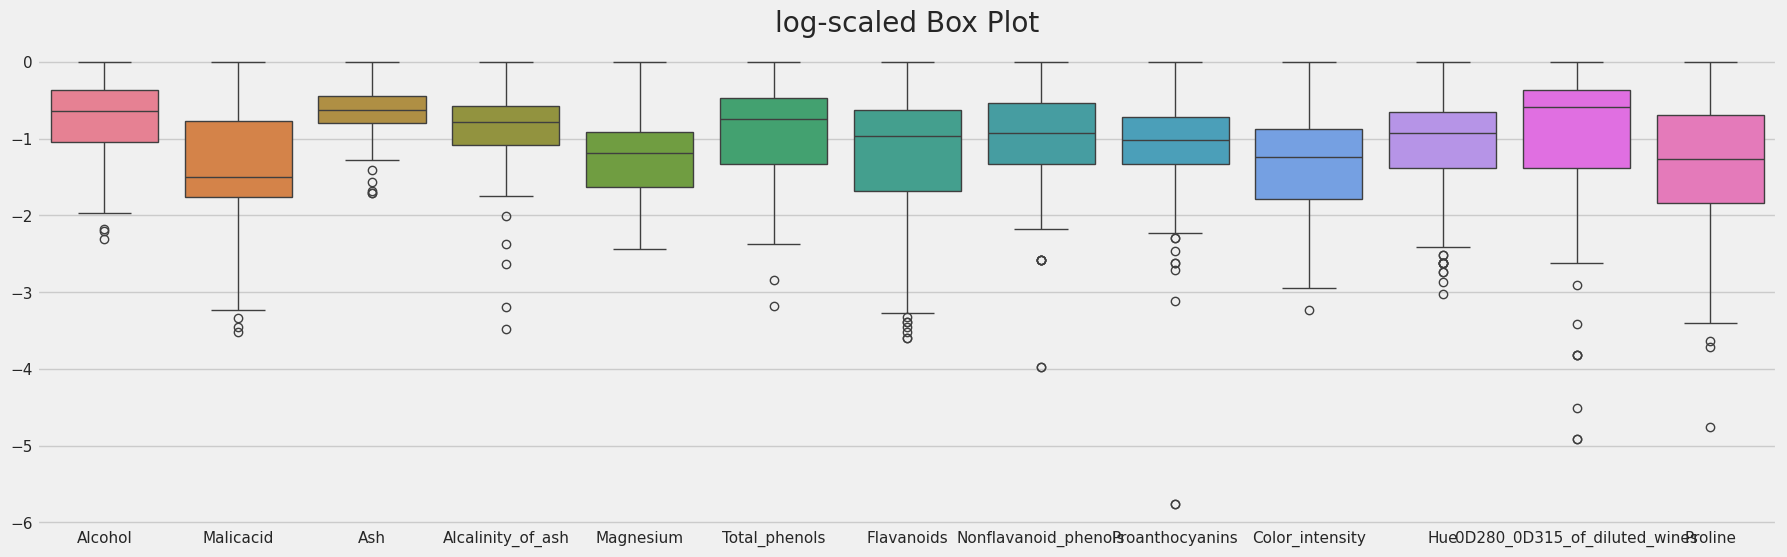

In [ ]:
# Create a box plot using Seaborn
plt.figure(figsize=(20, 6))
sns.boxplot(data=X_norm.apply(np.log))
plt.title("log-scaled Box Plot")
plt.show()

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, pd.get_dummies(y['class']), test_size=0.2, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_true=y_test, y_pred=y_pred, target_names=["low", "medium", "high"]))

Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

         low       1.00      1.00      1.00        14
      medium       0.93      0.93      0.93        14
        high       0.88      0.88      0.88         8

   micro avg       0.94      0.94      0.94        36
   macro avg       0.93      0.93      0.93        36
weighted avg       0.94      0.94      0.94        36
 samples avg       0.92      0.94      0.93        36

